# HANDSON 1

Bagus Ardin Saputra (120140186)

> Disarankan untuk menggunakan rekaman suara dengan sampling rate 44100 Hz untuk menghindari suara menimbulkan noise saat sedang di manipulasi


## Tugas 1


In [21]:
import os
import wave
import numpy as np
import librosa as ls
import matplotlib.pyplot as plt

Import library


In [22]:
lsdisplay = ls.display

Untuk mempermudah penulisan sintaks, saya mendefinisikan modul `display` dari `librosa` kedalam variabel `lsdisplay`


### Memuat Path Dataset

Dataset yang saya gunakan adalah dataset asli yang saya rekam dengan suara saya sendiri. Selain pada direktori proyek ini, dataset yang saya gunakan dapat diunduh pada [tautan ini](https://www.kaggle.com/datasets/ardinnn/data-ho-1/data).


In [23]:
path = 'data_ho1'
datasets = []
for i in os.listdir(path):
    datasets.append(f'{path}/{i}')

for i in datasets:
    print(i)

data_ho1/ho1_ess.wav
data_ho1/ho1_kencang.wav
data_ho1/ho1_liptrill.wav
data_ho1/ho1_pelan.wav
data_ho1/ho1_sedang.wav


Pada blok diatas, saya memuat keseluruhan path dari dataset dan menyimpannya kedalam list `datasets`.


### Memuat Data Audio


In [24]:
audio_data = []
for i in datasets:
    with wave.open(i, 'r') as wav_file:
        frames = wav_file.readframes(-1)
        data = np.frombuffer(frames, dtype='int16')
        sampling = wav_file.getframerate()
        channels = wav_file.getnchannels()

        audio_data.append({ 'data': data, 'sampling': sampling, 'channels': channels })

Saya memuat semua file audio dan menyimpannya kedalam list `audio_data`. List ini memuat data, sampling rate, dan channel dari setiap dataset audio yang saya gunakan. Hasil dari file audio yang sudah dimuat dapat dilihat di bawah.


In [25]:
for i in range(len(datasets)):
    print(f'Data Audio {datasets[i]}: {audio_data[i]['data']}')
    print(f'Panjang Data Audio {datasets[i]}: {len(audio_data[i]['data'])}')
    print(f'Sampling Rate Audio {datasets[i]}: {audio_data[i]['sampling']}')
    print(f'Channel Audio {datasets[i]}: {audio_data[i]['channels']}')
    print()

Data Audio data_ho1/ho1_ess.wav: [  0   0   0 ... -18  14  14]
Panjang Data Audio data_ho1/ho1_ess.wav: 415422
Sampling Rate Audio data_ho1/ho1_ess.wav: 44100
Channel Audio data_ho1/ho1_ess.wav: 2

Data Audio data_ho1/ho1_kencang.wav: [0 0 0 ... 0 0 0]
Panjang Data Audio data_ho1/ho1_kencang.wav: 687078
Sampling Rate Audio data_ho1/ho1_kencang.wav: 44100
Channel Audio data_ho1/ho1_kencang.wav: 2

Data Audio data_ho1/ho1_liptrill.wav: [   0    0    0 ... -211 -200 -200]
Panjang Data Audio data_ho1/ho1_liptrill.wav: 264600
Sampling Rate Audio data_ho1/ho1_liptrill.wav: 44100
Channel Audio data_ho1/ho1_liptrill.wav: 2

Data Audio data_ho1/ho1_pelan.wav: [  0   0   0 ... 302 297 297]
Panjang Data Audio data_ho1/ho1_pelan.wav: 796446
Sampling Rate Audio data_ho1/ho1_pelan.wav: 44100
Channel Audio data_ho1/ho1_pelan.wav: 2

Data Audio data_ho1/ho1_sedang.wav: [0 0 0 ... 0 0 0]
Panjang Data Audio data_ho1/ho1_sedang.wav: 736470
Sampling Rate Audio data_ho1/ho1_sedang.wav: 44100
Channel Audio 

### Membagi Audio Berdasarkan Channel


In [26]:
audio_channel = []
for i in range(len(audio_data)):
    audio_data[i]['data'] = audio_data[i]['data'].reshape(-1, audio_data[i]['channels'])
    print(audio_data[i]['data'].shape)

    left = audio_data[i]['data'][:, 0]
    right = audio_data[i]['data'][:, 1]

    audio_channel.append({
        'kiri': left,
        'kanan': right
    })

(207711, 2)
(343539, 2)
(132300, 2)
(398223, 2)
(368235, 2)


Dalam percobaan ini, data audio yang saya gunakan memiliki 2 channel. Hal ini ditandai dengan nilai dari data audio yang memiliki nilai positif menandakan bahwa audio berada di channel kanan, sedangkan nilai negatif yang menandakan bahwa audio berada di channel kiri, atau lebih mudahnya kita dapat melihat jumlah channel yang tertera dari hasil audio yang telah dimuat sebelumnya dengan library `wave`. Sebelum dapat diproses dan divisualisasikan, data audio haruslah dipisah terlebih dahulu sesuai dengan channelnya masing-masing. Hal ini bertujuan agar saat data audio ditampilkan dapat lebih rapih dan mudah di analisa.


In [27]:
for i in range(len(datasets)):
    print(f'Channel Kiri Audio {datasets[i]}: {audio_channel[i]['kiri']}')
    print(f'Panjang Channel Kiri Audio {datasets[i]}: {len(audio_channel[i]['kiri'])}')
    print(f'Channel Kanan Audio {datasets[i]}: {audio_channel[i]['kiri']}')
    print(f'Panjang Channel Kanan Audio {datasets[i]}: {len(audio_channel[i]['kiri'])}')
    print()

Channel Kiri Audio data_ho1/ho1_ess.wav: [  0   0   0 ... -39 -18  14]
Panjang Channel Kiri Audio data_ho1/ho1_ess.wav: 207711
Channel Kanan Audio data_ho1/ho1_ess.wav: [  0   0   0 ... -39 -18  14]
Panjang Channel Kanan Audio data_ho1/ho1_ess.wav: 207711

Channel Kiri Audio data_ho1/ho1_kencang.wav: [0 0 0 ... 0 0 0]
Panjang Channel Kiri Audio data_ho1/ho1_kencang.wav: 343539
Channel Kanan Audio data_ho1/ho1_kencang.wav: [0 0 0 ... 0 0 0]
Panjang Channel Kanan Audio data_ho1/ho1_kencang.wav: 343539

Channel Kiri Audio data_ho1/ho1_liptrill.wav: [   0    0    0 ... -222 -211 -200]
Panjang Channel Kiri Audio data_ho1/ho1_liptrill.wav: 132300
Channel Kanan Audio data_ho1/ho1_liptrill.wav: [   0    0    0 ... -222 -211 -200]
Panjang Channel Kanan Audio data_ho1/ho1_liptrill.wav: 132300

Channel Kiri Audio data_ho1/ho1_pelan.wav: [  0   0   0 ... 300 302 297]
Panjang Channel Kiri Audio data_ho1/ho1_pelan.wav: 398223
Channel Kanan Audio data_ho1/ho1_pelan.wav: [  0   0   0 ... 300 302 297]


Setelah channel audio dipisah, panjang data audio kini berubah disetiap channelnya. Setiap channel (kanan dan kiri) dapat dikatakan merupakan separuh nilai dari panjang data audio sebelum dipisahkan. Sebagai contoh pada audio 1, sebelumnya memiliki data sepanjang ` 1128960`, sedangkan setelah dilakukan pemisahan channel, didapatkan nilai pada channel kiri audio 1 sepanjang `564480` dan kanan `564480`. Jika kita menjumlahkan nilai panjang dari setiap channel ini akan menghasilkan nilai panjang semula dari data audio sebelum dilakukan pemisahan channel.


### Visualisasi Audio


In [31]:
def visualize(time_axis, left_audio, right_audio, x_figsize, audio_file):
    ax, fig = plt.subplots(2, 1, figsize=(x_figsize, 5))
    fig[0].plot(time_axis, left_audio, label='Kiri')
    fig[0].set_title(f'{audio_file} Kiri')
    fig[0].set_xlabel('Waktu (Detik)')
    fig[0].grid()
    fig[1].plot(time_axis, right_audio, label='Kiri')
    fig[1].set_title(f'{audio_file} Kanan')
    fig[1].set_xlabel('Waktu (Detik)')
    fig[1].grid()
    plt.tight_layout()
    plt.show()

Karena percobaan dilakukan secara bersamaan dengan menjalankan total sebanyak 5 dataset, maka saya memilih untuk membuat plot dalam bentuk fungsi yang saya namakan dengan `visualize()`.


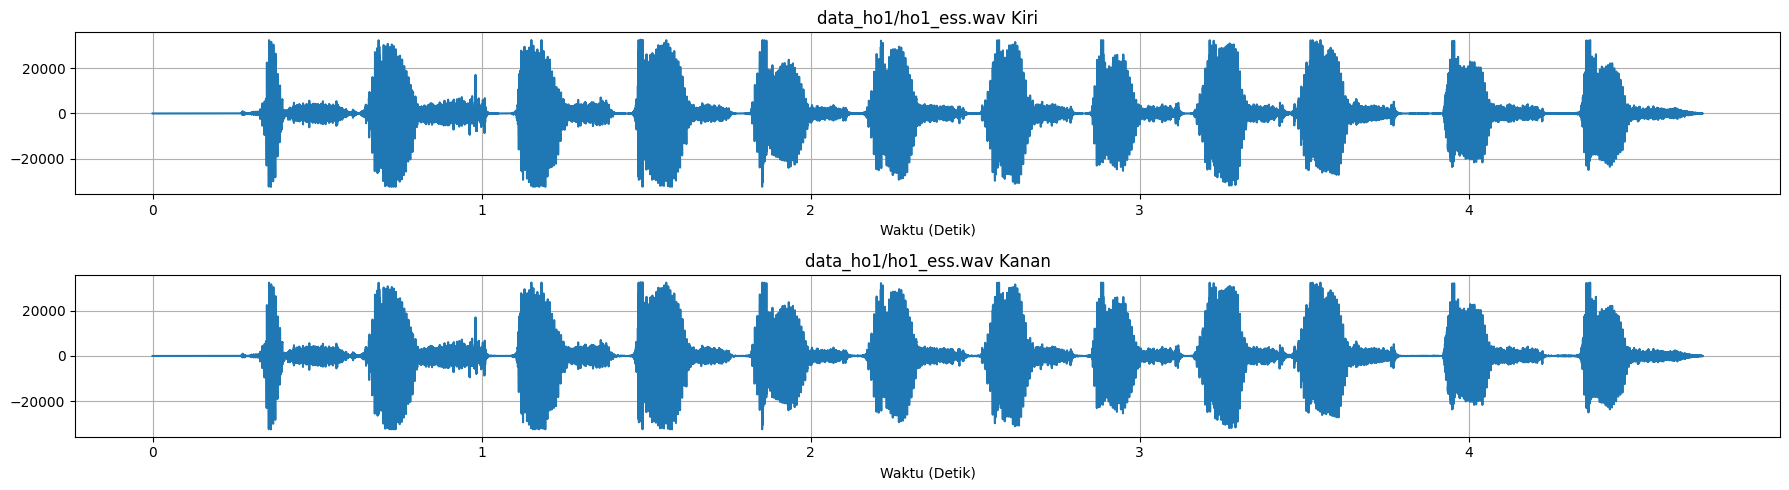

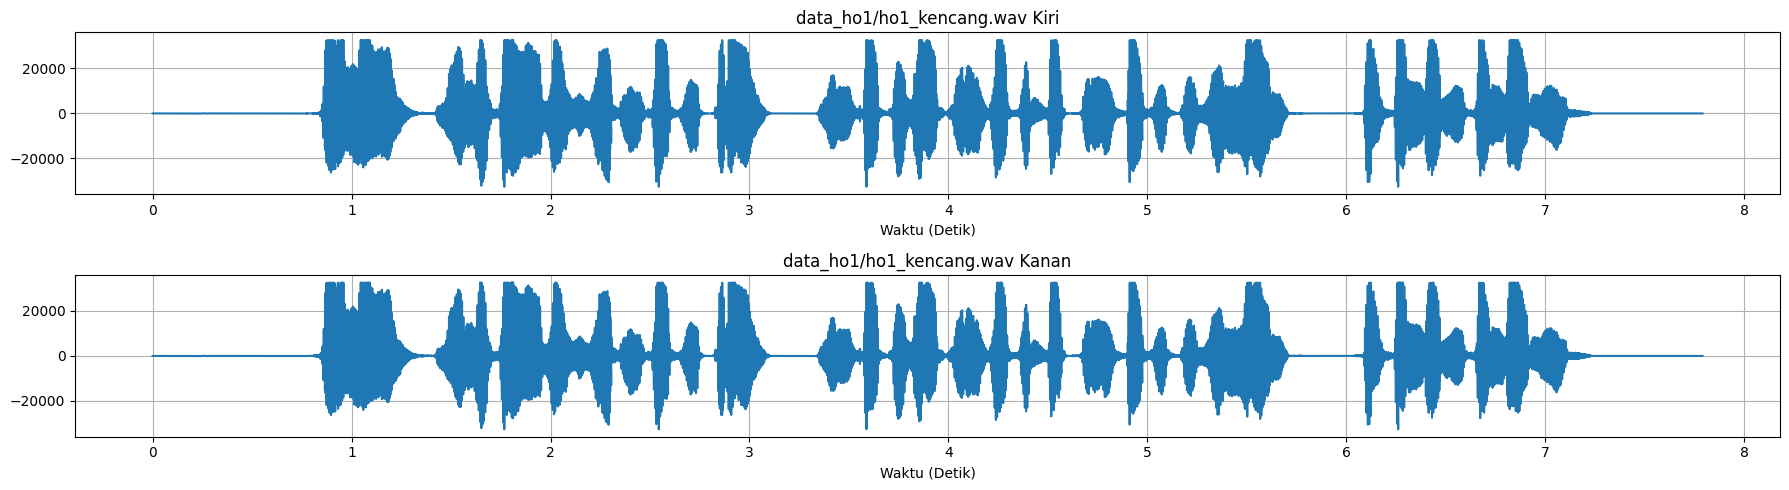

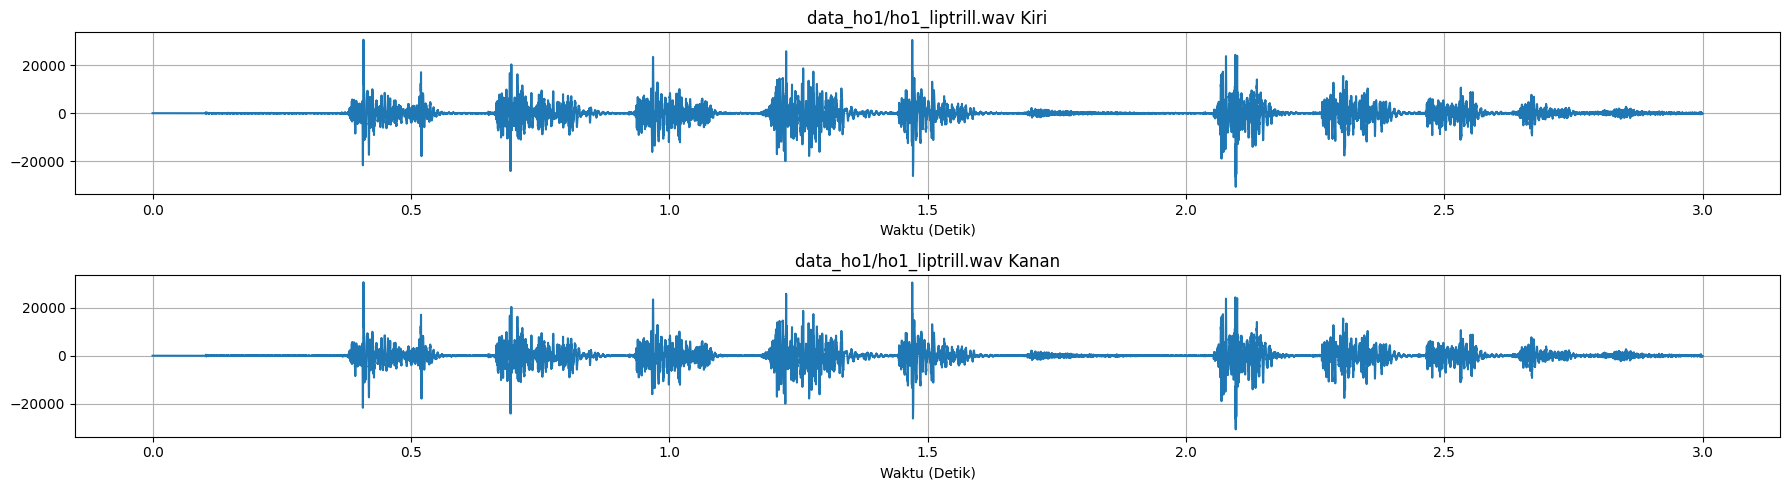

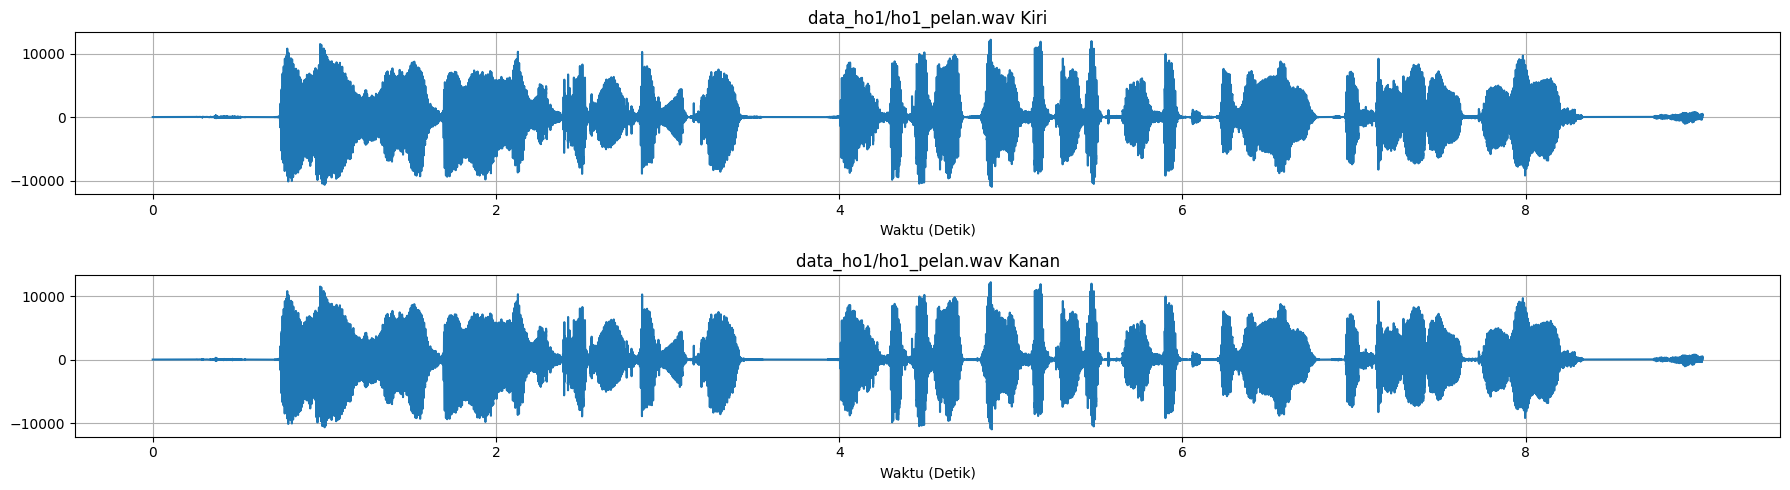

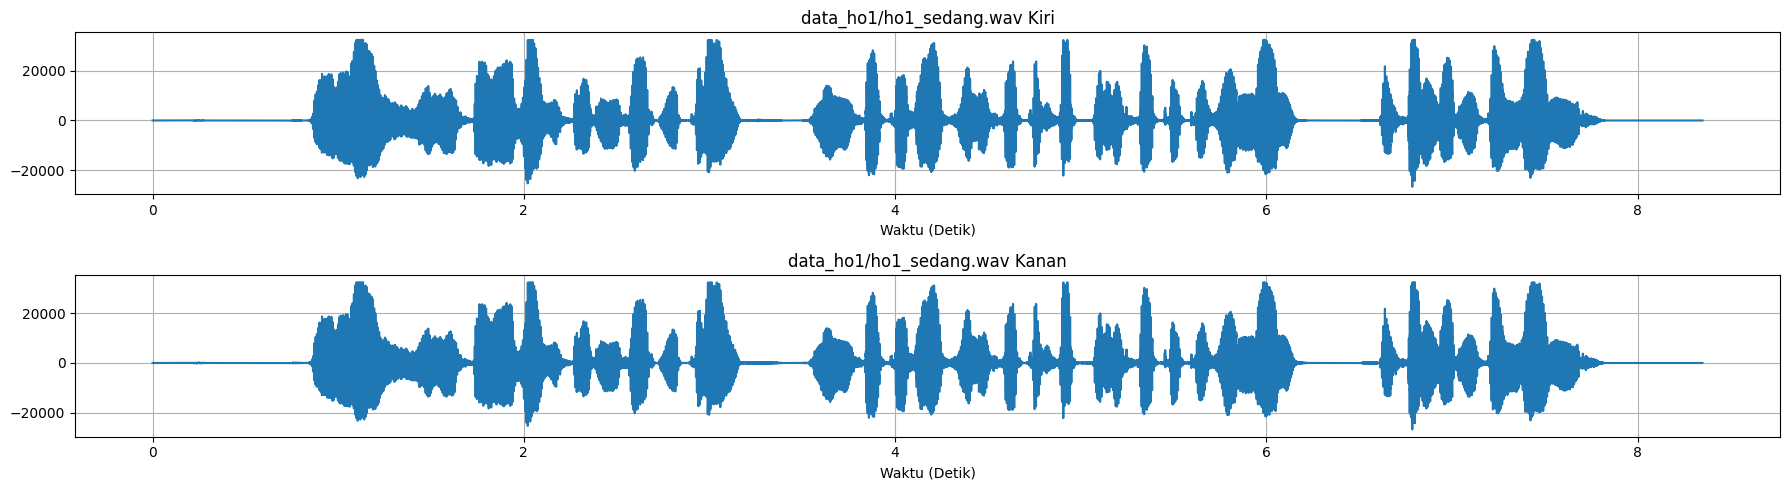

In [32]:
import math

for i in range(len(datasets)):
    time_axis = np.linspace(0, len(audio_channel[i]['kiri'])/audio_data[i]['sampling'], len(audio_channel[i]['kiri']))
    # x_figsize = math.ceil(len(audio_channel[i]['kiri'])/audio_data[i]['sampling'])
    x_figsize = 18
    visualize(time_axis, audio_channel[i]['kiri'], audio_channel[i]['kanan'], x_figsize, datasets[i])


### Analisis Singkat Hasil Percobaan

1. Pada percobaan dengan mengunakan Audio 1 (Volume Relatif Rendah), menghasilkan output visualisasi frekuensi audio pada kanal kiri dan kanan dengan frekuensi berkisar antara:
   ```python
   -10000<x<10000
   ```
2. Pada percobaan dengan mengunakan Audio 2 (Volume Relatif Sedang), menghasilkan output visualisasi frekuensi audio pada kanal kiri dan kanan dengan frekuensi berkisar antara:
   ```python
   -20000<x<20000
   ```
3. Pada percobaan dengan mengunakan Audio 3 (Volume Relatif Keras), menghasilkan output visualisasi frekuensi audio pada kanal kiri dan kanan dengan frekuensi berkisar antara:
   ```python
   -20000<x<20000
   ```
4. Pada percobaan dengan mengunakan Audio 4 (Dominan dengan bunyi huruf "s"), menghasilkan output visualisasi frekuensi audio pada kanal kiri dan kanan dengan frekuensi berkisar antara:
   ```python
   -20000<x<20000
   ```
5. Pada percobaan dengan mengunakan Audio 5 (Dominan _lip trill_), menghasilkan output visualisasi frekuensi audio pada kanal kiri dan kanan dengan frekuensi berkisar antara:
   ```python
   -20000<x<20000
   ```


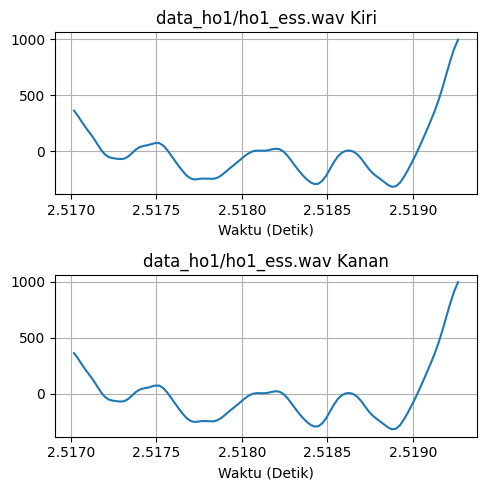

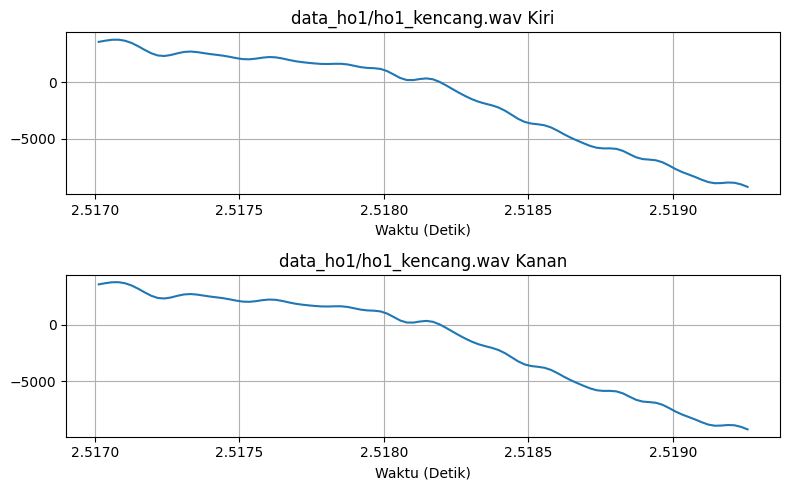

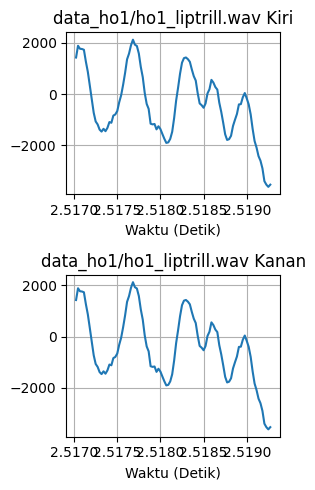

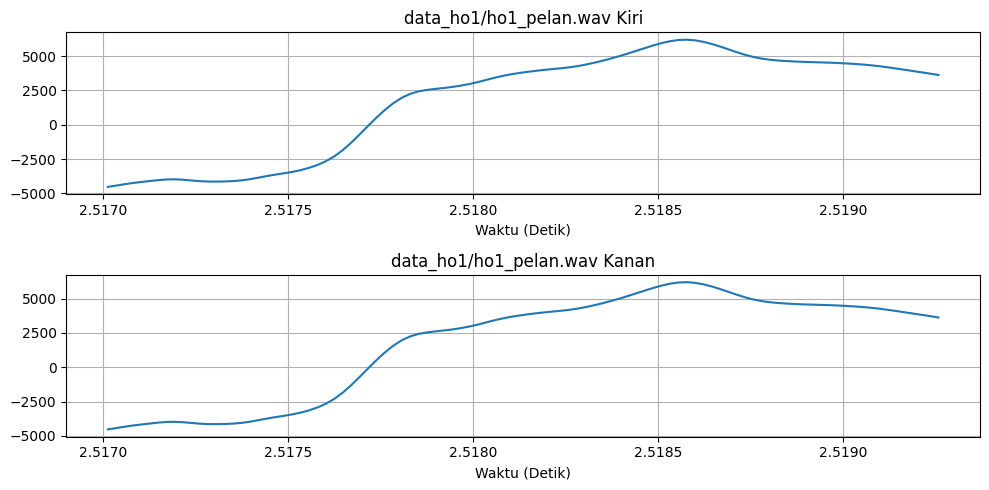

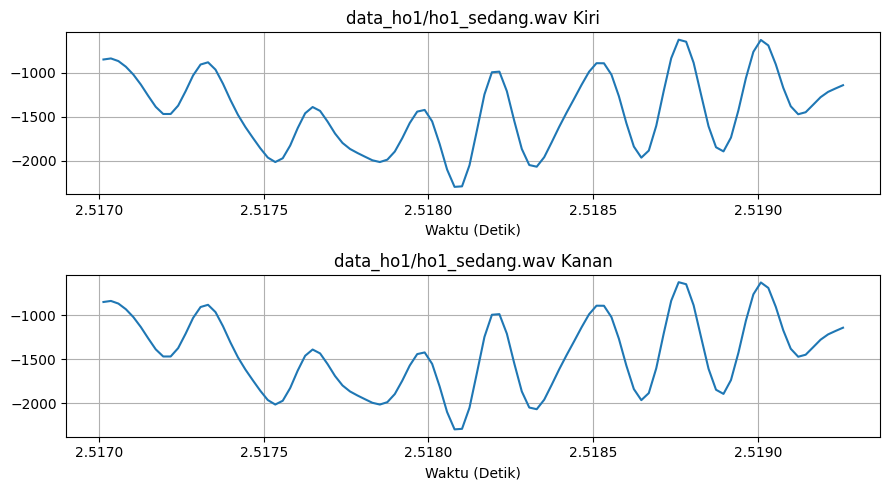

In [33]:
for i in range(len(datasets)):
    time_axis = np.linspace(0, len(audio_channel[i]['kiri'])/audio_data[i]['sampling'], len(audio_channel[i]['kiri']))
    x_figsize = math.ceil(len(audio_channel[i]['kiri'])/audio_data[i]['sampling'])
    visualize(time_axis[111000:111100], audio_channel[i]['kiri'][111000:111100], audio_channel[i]['kanan'][111000:111100], x_figsize, datasets[i])


### Spectogram


In [34]:
audio_data = []
for i in range(len(datasets)):
    d, sr = ls.load(datasets[i])
    audio_data.append({'data': d, 'sampling_rate': sr})

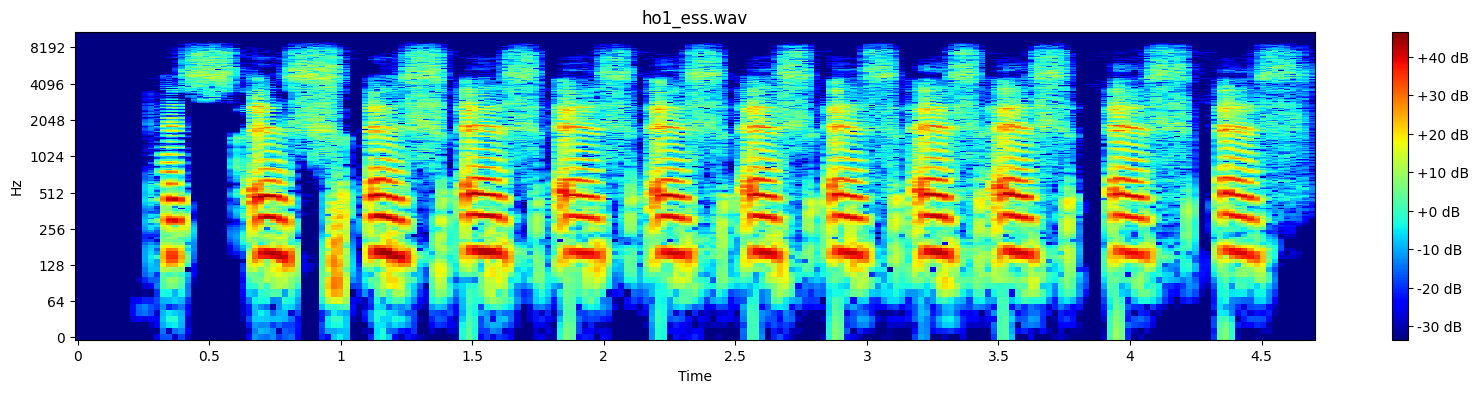

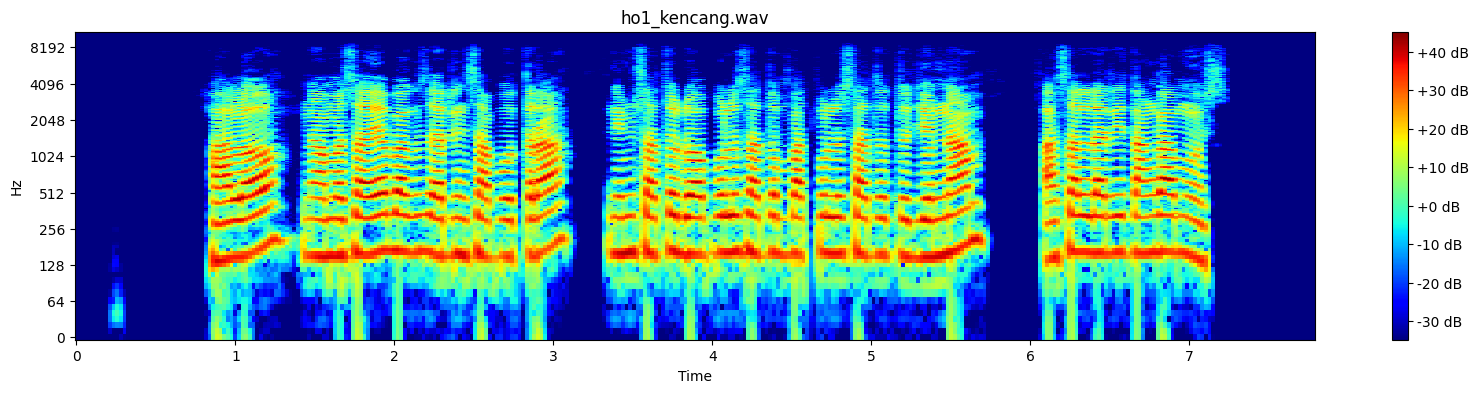

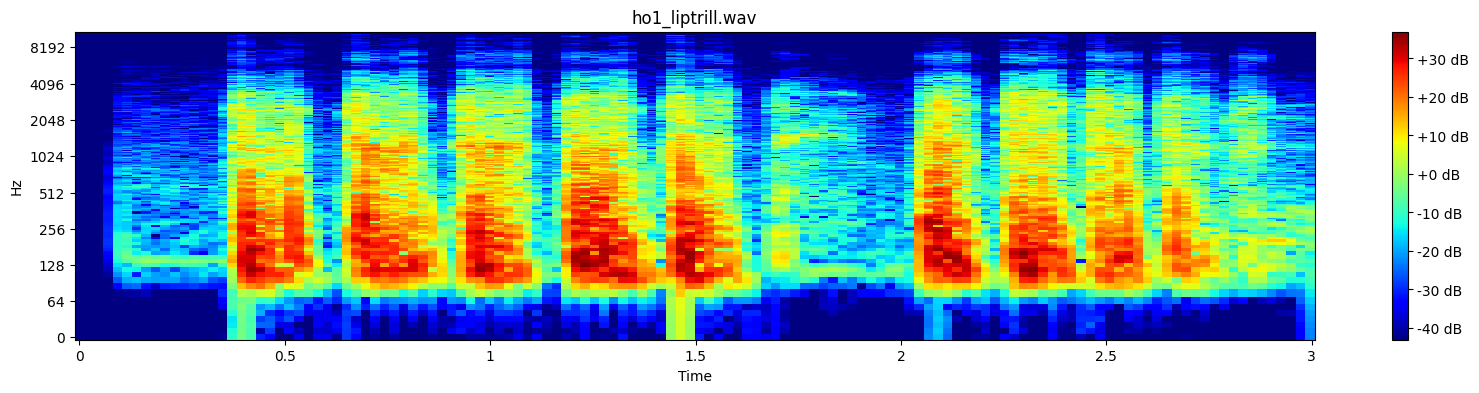

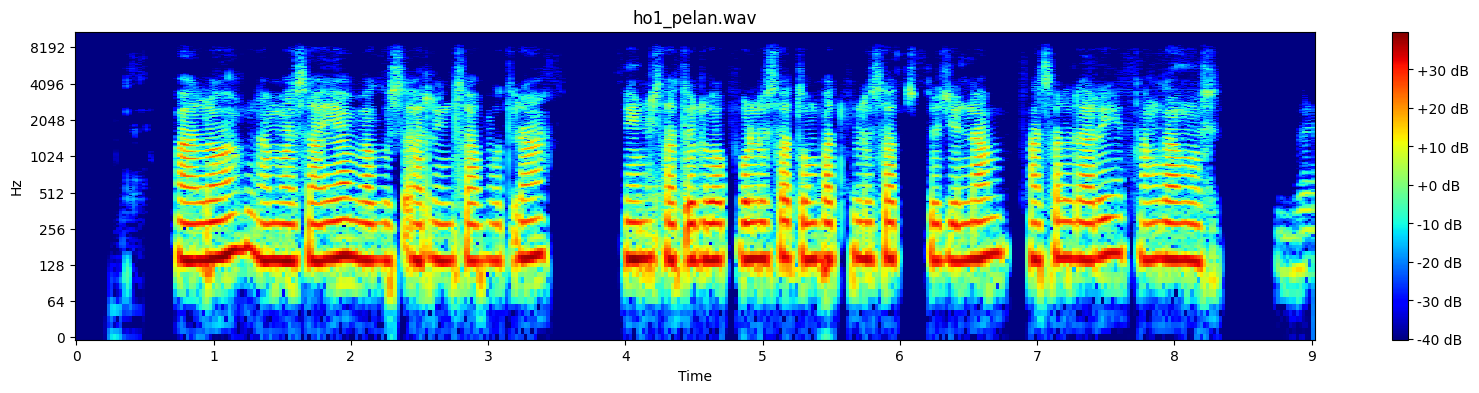

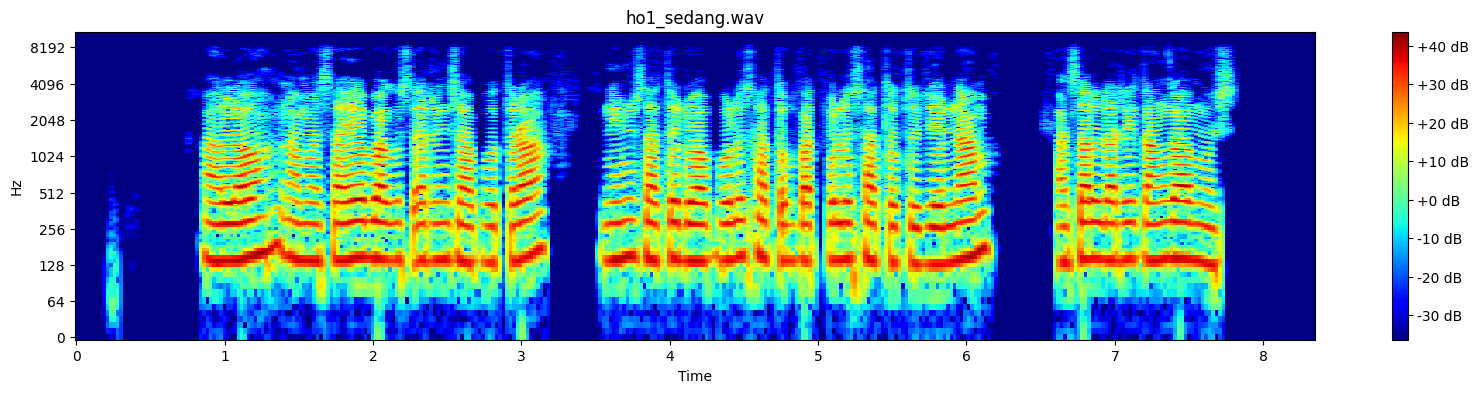

In [37]:
for i in range(len(datasets)):
    plt.figure(figsize=(20, 4))
    plt.title(f'{datasets[i].split('/')[1]}')
    lsdisplay.specshow(ls.amplitude_to_db(np.abs(ls.stft(audio_data[i]['data']))), sr=audio_data[i]['sampling_rate'], x_axis='time', y_axis='log', cmap='jet')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

### Analisis Spektogram

#### Audio 1 (Dominan Volume Rendah)

Pada percobaan dengan menggunakan audio pertama, tingkat kebisingan tergolong tinggi pada frekuensi rendah, hal ini berlangsung selama durasi audio. Perkiraan puncak kebisingan tertinggi mencapai +30 dB pada frekuensi 128-256 Hz.

#### Audio 2 (Dominan Volume Sedang)

Pada percobaan dengan menggunakan audio kedua, tingkat kebisingan relatif naik. Pada percobaan kedua, tingkat bar desibel meningkat menjadi +40 dB dan menurun pada frekuensi tinggi.

#### Audio 3 (Dominan Volume Tinggi)

Pada percobaan dengan menggunakan audio ketiga, tingkat kebisingan relatif naik. Pada percobaan ketiga, tingkat bar desibel adalah +40 dB. Terdapat penuruan desibel pada frekuensi tinggi.

#### Audio 4 (Dominan Menyebut "essss")

Pada percobaan dengan menggunakan audio keempat, kebisingan maksimal terlihat pada bar mencapai +40dB. Kebisingan dengan nilai tertinggi hanya terdapat pada frekuensi rendah, dan semakin memudar pada frekuensi tinggi.

#### Audio 5 (Dominan _Lip Trill_)

Pada percobaan dengan menggunakan audio yang dominan dengan liptrill, tingkat kebisingan puncak hanya mencapai +30db, namun stabil hingga akhir audio. Tingkat kebisingan puncak terjadi merata pada frekuensi 64 hingga 1024.


## Tugas 2


### Menentukan Jenis Soal


In [38]:
nim = 120140176
last_index_of_nim = int(str(nim)[8])
if last_index_of_nim%2 == 0:
    print("Kerjakan Fading Exponential")
else:
    print("Kerjakan Logarithmic Scale Fading")

Kerjakan Fading Exponential


Siapa sangka, ternyata saya nim genap
<br>
<img src="assets/siapa sangka.jpg" alt="ini_watermark_(120140176).jpeg" width="320" >


In [80]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import os

In [81]:
dataset = os.path.join(os.getcwd(), 'data_ho1', 'perkenalan.wav')

# console.log(file_path)
print(dataset)

c:\Users\HP\multimedia\if4021-handson\data_ho1\perkenalan.wav


In [82]:
with wave.open(dataset, 'r') as wav:
    audio = wav.getparams()
    audio_data = np.frombuffer(wav.readframes(audio.nframes), dtype=np.int16)

print(f'Panjang Data: {len(audio_data)}')
print(f'Jumlah Sampel: {audio.nframes}')
print(f'Frekuensi: {audio.framerate}')
print(f'Kanal: {audio.nchannels}')

Panjang Data: 984312
Jumlah Sampel: 984312
Frekuensi: 44100
Kanal: 1


#### Visualisasi Audio


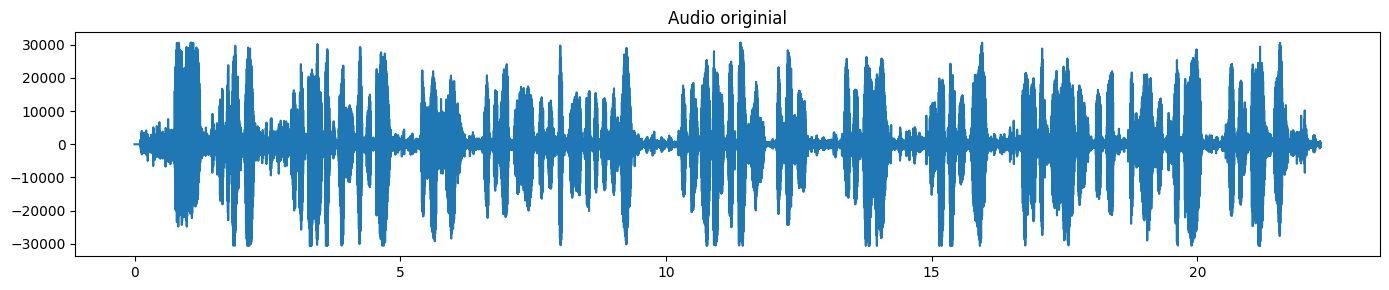

In [83]:
time_axis = np.linspace(
    0,
    audio.nframes/audio.framerate,
    audio.nframes
)

plt.figure(figsize=(14, 3))
plt.title("Audio originial")
plt.plot(time_axis, audio_data)
plt.tight_layout()
plt.show()

#### Membuat Kurva Fading

Akan terdapat dua jenis kurva yang akan dibuat, yaitu kurva untuk `fade in` dam kurva untuk `fade out`. Fade in diterapkan pada awal audio, sedangkan fade out akan diterapkan di akhir audio.


In [84]:
duration = 5
fading_sampel = duration * audio.framerate

# print(f"Durasi: {duration} detik")
print(f"Panjang Sampel Fading: {fading_sampel}")

Panjang Sampel Fading: 220500


In [85]:
fade_in_curve = np.linspace(0, 1, fading_sampel)
fade_out_curve = np.linspace(0, 1, fading_sampel)[::-1] # Kalau fade out ya tinggal di balik lah 

print(len(fade_in_curve))

220500


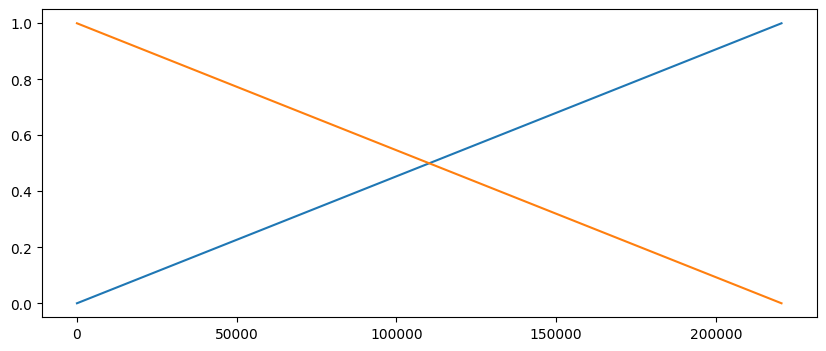

In [86]:
plt.figure(figsize=(10, 4))
plt.plot(fade_in_curve)
plt.plot(fade_out_curve)
plt.show()

Dapat terlihat, bahwa kurva yang kita buat masih berbentuk linear yang ditandai dengan garis kurva yang naik secara perlahan. Fading exponential tegolong dalam teknik fading non linear, yang seharusnya memiliki garis kurva yang lebih tajam. Untuk mengatasi hal ini, kita perlu menambahkan parameter ketajaman, sehingga nantinya akan ada efek suara yang "kaget" atau terkesan mendadak pada bagian awal audio. Sebagai bahan perbandingan untuk dapat membedakan bentuk kurva exponensial dan linear, mari kita lihat gambar yang saya ambil dari [tautan ini](https://media.istockphoto.com/id/1310215733/id/vektor/fungsi-eksponensial-dan-fungsi-linear-dalam-grafik-atau-bagan-yang-diisolasi-di-atas-putih.jpg?s=1024x1024&w=is&k=20&c=aCTWJqDF6V5F-c3skuzrIdQQqg83XXD18LeUn-pFGhQ=)
<br>
<img src="assets/exponential_linear_curve.jpg" alt="exponential and linear curve example" width="400">


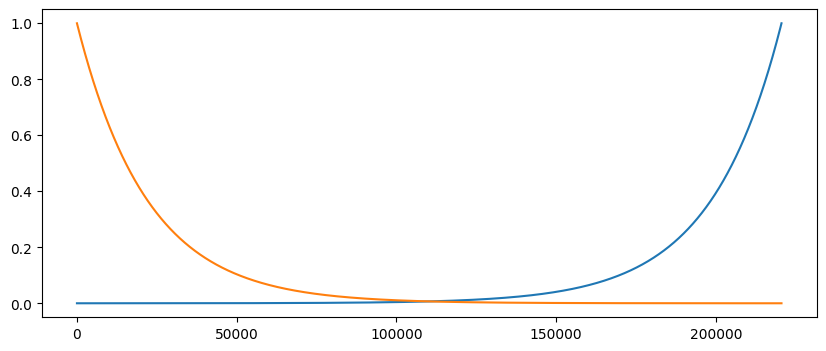

In [87]:
ketajaman = 10 # nilai ketajaman atau ekponensial
exp_fade_in = np.exp(fade_in_curve * ketajaman)-1
exp_fade_in /= exp_fade_in.max()
exp_fade_out = np.exp(fade_out_curve * ketajaman)-1
exp_fade_out /= exp_fade_out.max()

plt.figure(figsize=(10, 4))
plt.plot(exp_fade_in)
plt.plot(exp_fade_out)
plt.show()

Gambar di atas merupakan hasil setelah kurva dirubah menjadi eksponensial. Kita akan coba menerapkan kurva ini kedalam audio kita. Dapat kita katakan berhasil jika terjadi kenaikan volume ke normal pada awal audio di putar dengan durasi transisi 5 detik dan penurunan volume pada akhir audio dengan durasi transisi 5 detik.


In [88]:
new_audio = audio_data.copy() # copy data dari audio yang belum di beri fading
new_audio[:fading_sampel] = new_audio[:fading_sampel]*exp_fade_in # memberi fade in
new_audio[-fading_sampel:] = new_audio[-fading_sampel:]*exp_fade_out # memberi fade out

print(len(audio_data))
print(len(new_audio))

984312
984312


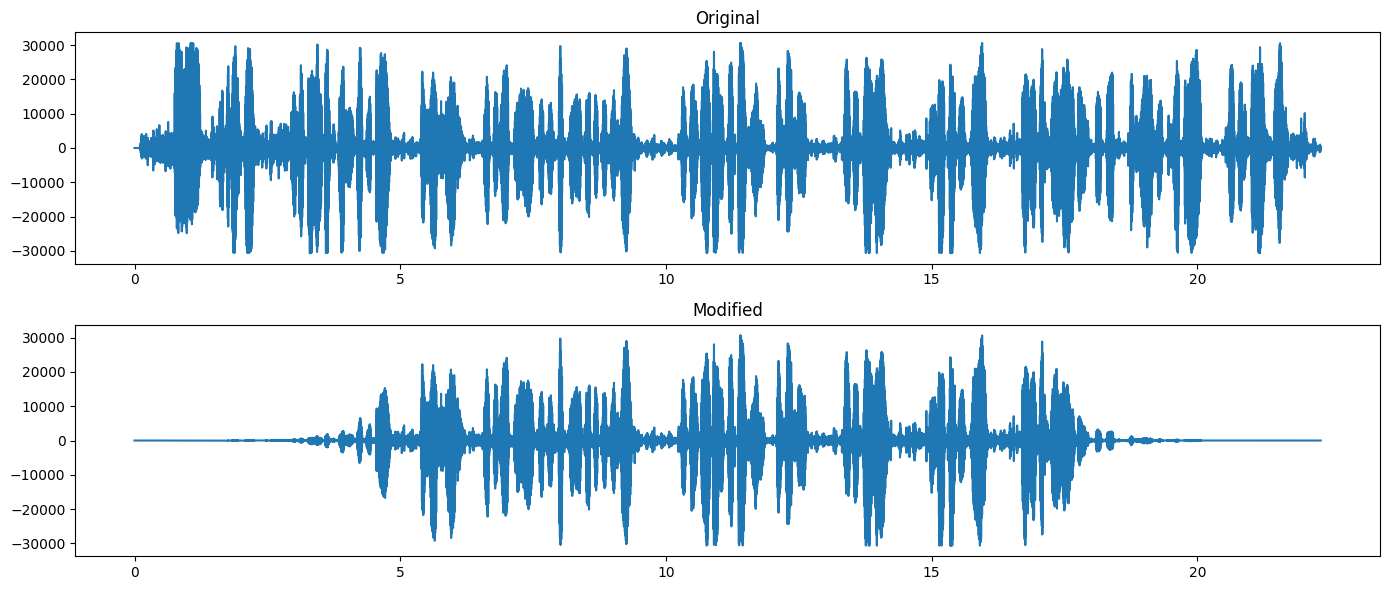

In [89]:
ax, fig = plt.subplots(2, 1, figsize=(14, 6))
fig[0].set_title("Original")
fig[0].plot(time_axis, audio_data)
fig[1].set_title("Modified")
fig[1].plot(time_axis, new_audio)
plt.tight_layout()
plt.show()

Hmmm, menarik. Kita coba dengarkan dulu hasilnya


In [90]:
folder_name = 'faded_audio'
output_path = os.path.join(os.getcwd(), folder_name, 'faded_audio.wav')

if not os.path.exists(output_path):
    os.mkdir(folder_name)
else:
    pass

print(audio.nchannels)

with wave.open(output_path, 'w') as output_file:
    output_file.setnchannels(audio.nchannels)
    output_file.setsampwidth(audio.sampwidth)
    output_file.setframerate(audio.framerate)
    output_file.writeframes(new_audio.tobytes())

1


Setelah melalui proses fading pada bagian awal dan akhir, audio yang sebelumnya memiliki volume datar kini pada bagian awal memiliki volume yang rendah dan naik secara signifikan pada durasi 5 detik, sedangkan pada bagian akhi volume audio menurun secara drastis pada durasi 17 detik. Maka saya simpulkan bahwa percobaan untuk menerapkan fading exponential berhasil menurunkan volume audio pada bagian akhir dan berhasil meningkatkan volume audio secara signifikan pada awal audio. Dan dengan ini juga, saya nyatakan bahwa challenge pada tugas 2 `Buatlah kurva fade out dengan durasi 5 detik` berhasil saya kerjakan.


## Tugas 3


In [133]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# dataset
dataset = os.path.join(os.getcwd(), 'data_ho1', 'perkenalan.wav')

if not os.path.exists(dataset):
    raise ValueError("Dataset tidak tersedia")

In [135]:
# Mendapatkan spesifikasi audio
with wave.open(dataset, 'r') as wav:
    audio_params = wav.getparams()
    audio_data = np.frombuffer(wav.readframes(audio_params.nframes), dtype=np.int16)

print(f"Jumlah Kanal: {audio_params.nchannels}")
print(f"Jumlah Frame: {audio_params.nframes}")
print(f"Audio Sampel: {audio_params.framerate} Hz")


Jumlah Kanal: 1
Jumlah Frame: 984312
Audio Sampel: 44100 Hz


#### Visualisasi Audio Asli


In [136]:
time_axis = np.linspace(0, audio_params.nframes/audio_params.framerate, audio_params.nframes)

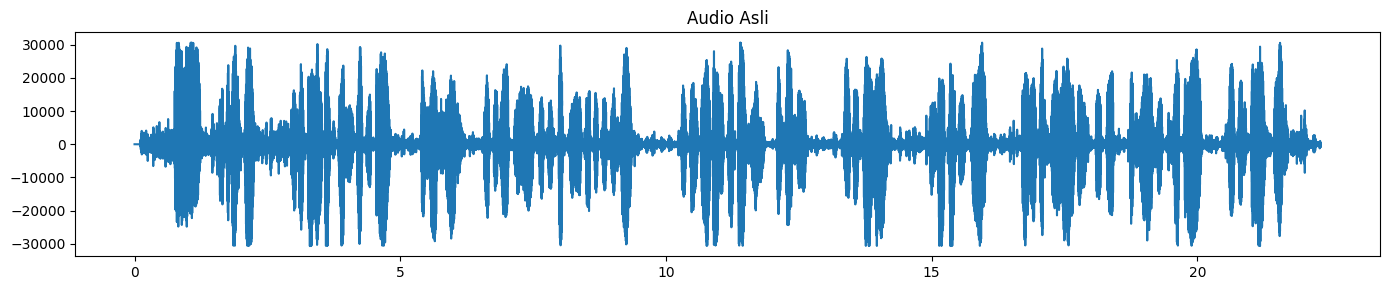

In [137]:
plt.figure(figsize=(14, 3))
plt.plot(time_axis, audio_data)
plt.title("Audio Asli")
plt.tight_layout()
plt.show()

### Compression


In [139]:
audio_for_compres = audio_data.copy()

In [140]:
# Mendapatkan rentang maksimal dari data audio
max_range = np.max(np.abs(audio_for_compres))

print(max_range)

30684


In [141]:
# mendapatkan threshold
threshold = .4 * max_range
print(threshold)

12273.6


In [142]:
# mendapatkan daftar index dari range audio yang melebihi batasan threshold
mask = np.abs(audio_for_compres) > threshold
print(np.sum(mask))

40541


In [143]:
ratio = 6

audio_for_compres[mask] = threshold + (np.abs(audio_for_compres[mask]) - threshold) / ratio
audio_for_compres = np.clip(audio_for_compres, -max_range, max_range)

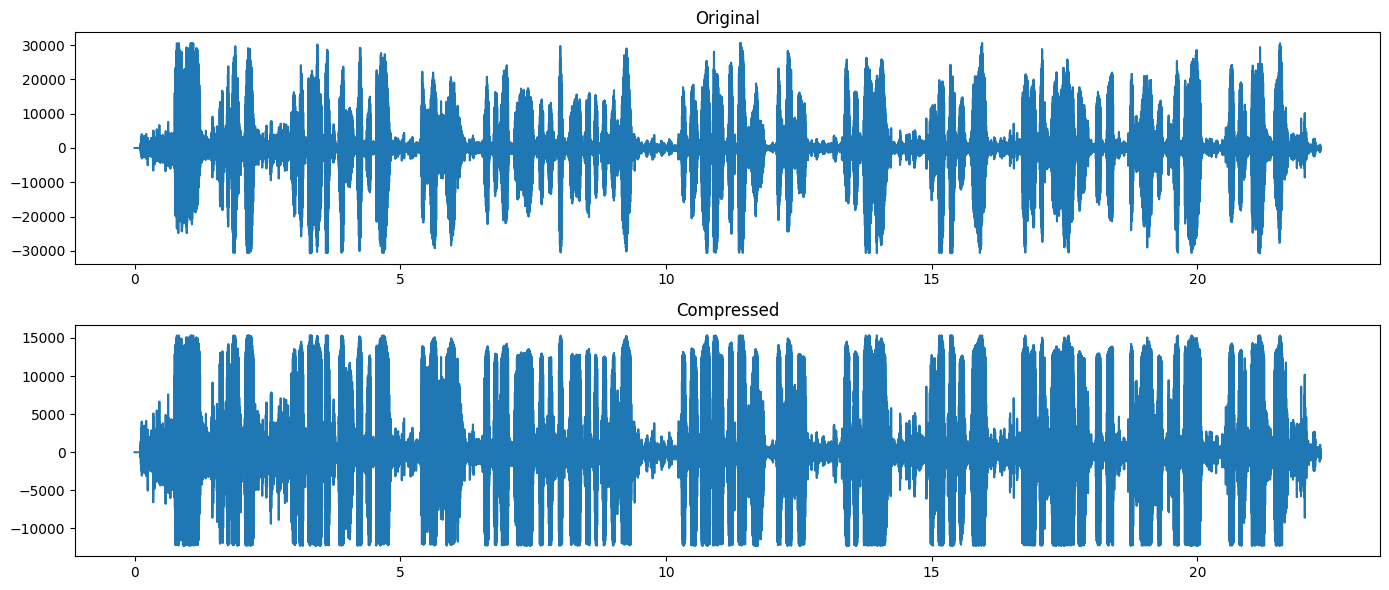

In [145]:
time_axis = np.linspace(0, audio_params.nframes/audio_params.framerate, audio_params.nframes)

ax, fig = plt.subplots(2, 1, figsize=(14, 6))
fig[0].plot(time_axis, audio_data, label='Original')
fig[0].set_title("Original")
fig[1].plot(time_axis, audio_for_compres, label='Compressed')
fig[1].set_title("Compressed")
plt.tight_layout()
plt.show()

Dari gambar di atas, kita dapat melihat bahwa frekuensi audio yang melebihi batas threshold akan dihilangkan. Audio original yang sebelumnya memilki tingkat frekuensi hingga 30000, kini memiliki rata-rata dibawah 15000. Setelah melalui tahap kompres ini, selanjutnya audio masih perlu melalui proses normalisasi teknik LUFS.


### LUFS


In [146]:
# casting audio ke float 32
audio_casted = audio_for_compres.copy() # salin ke variabel baru agar tidak merusak data audio asli
audio_casted = audio_casted.astype(np.float32) / (2**(16-1)-1) # alias 32767

audio_casted

array([ 0.        ,  0.        ,  0.        , ..., -0.00030519,
        0.00103763,  0.00283822], dtype=float32)

In [147]:
# ukur tingkat kebisingan tertinggi nya
peak_amp = np.max(np.abs(audio_casted))
loudness = 20 * np.log10(peak_amp)
print(loudness)

-6.591094


In [148]:
target = -14.0
gain = target - loudness
print(gain)

-7.408906


In [149]:
# normalisasi
audio_normalized = audio_casted * (10**(gain/20))

In [150]:
new_peak_amp = np.max(np.abs(audio_normalized))
new_loudness = 20 * np.log10(new_peak_amp)
print(f"Loudness setelah normalisasi: {new_loudness} dBFS")

Loudness setelah normalisasi: -14.000000953674316 dBFS


In [151]:
output_path = os.path.join(os.getcwd(), 'lufs_output', 'loudness.wav')

if not os.path.exists(output_path):
    os.mkdir('lufs_output')
else:
    pass

with wave.open(output_path, 'wb') as output_file:
    output_file.setnchannels(audio_params.nchannels)  # sesuaikan dengan jumlah channel audio asli
    output_file.setsampwidth(audio_params.sampwidth)  # 2 bytes untuk format int16
    output_file.setframerate(audio_params.framerate)
    output_file.writeframes((audio_normalized * 32767).astype(np.int16).tobytes())

Hasil dari operasi loudness ini adalah audio yang memiliki tingkat kebisingan atau volume yang lebih rendah dari audio aslinya.


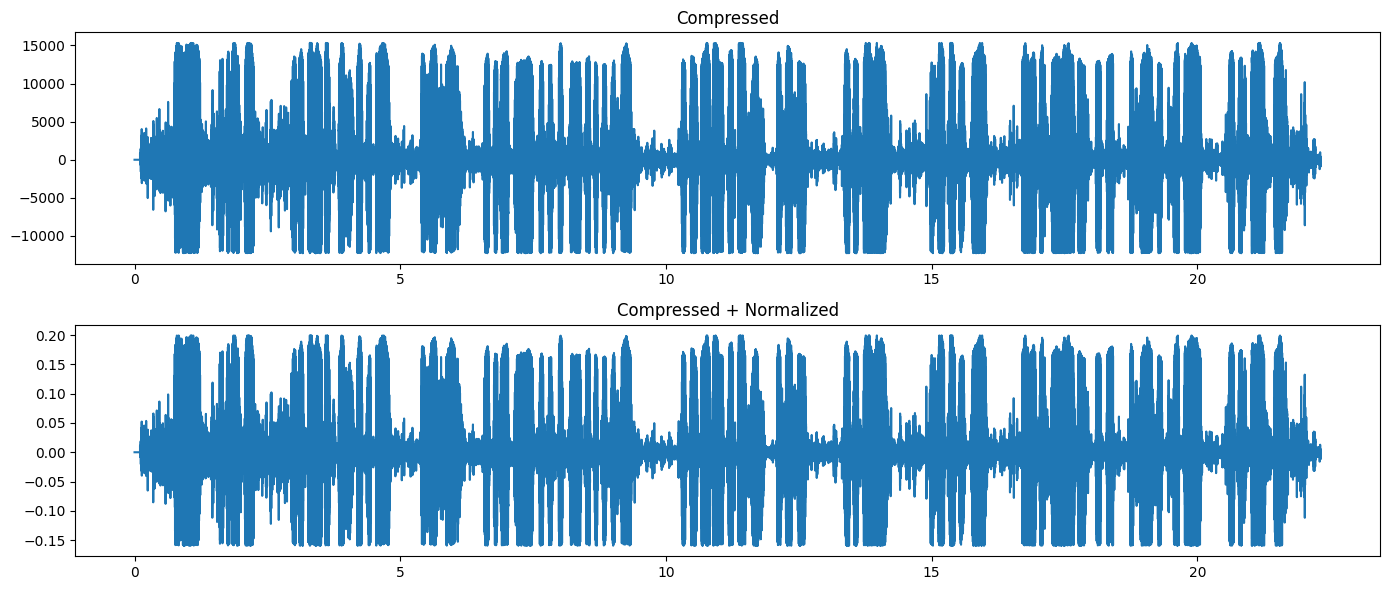

In [152]:
ax, fig = plt.subplots(2,1, figsize=(14, 6))
fig[0].set_title("Compressed")
fig[0].plot(time_axis, audio_for_compres)
fig[1].set_title("Compressed + Normalized")
fig[1].plot(time_axis, audio_normalized)
plt.tight_layout()
plt.show()

Dalam kasus suara yang digunakan dalam percobaan ini, suara yang terdengar lebih bergetar. Dalam beberapa kasus suara bergetar dapat disebabkan oleh tingkat frekuensi yang rendah, selain itu volume suara juga menurun.


## Tugas 4


### Equalizatoin Low Pass Filtering

Alasan utama saya memilih filter jenis low pass dikarenakan suara yang saya rekam dominan dengan noise yang terdapat pada frekuensi tinggi. Karakteristik suara yang saya rekam dominan dengan noise seperti huruf `s`. Dengan low pass filter ini, diharapkan suara asli saya yang dominan berada pada frekuensi rendah dapat terdengar lebih bersih.


In [153]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import os

In [157]:
# path audio / dataset
dataset = os.path.join(os.getcwd(), 'data_ho1', 'perkenalan.wav')

In [158]:
# memeriksa apakah path tersedia
if not os.path.exists(dataset):
    raise ValueError("Dataset tidak tersedia")
else:
    pass

In [160]:
# mendapatkan parameter dan data audio
with wave.open(dataset, 'r') as wav:
    audio_params = wav.getparams()
    audio_data = np.frombuffer(wav.readframes(audio_params.nframes), dtype=np.int16)

# Spesifikasi audio
print(f"Panjang Sampel: {audio_params.sampwidth}")
print(f"Frekuensi: {audio_params.framerate} Hz")
print(f"Jumlah Channel: {audio_params.nchannels}")

Panjang Sampel: 2
Frekuensi: 44100 Hz
Jumlah Channel: 1


Sebelum melanjutkan, kita perlu tahu terlebih dahulu mengenai spesifikasi audio yang kita gunakan terutama berapa frekuensi tertinggi yang dimiliki oleh audio saat ini. Hal ini berguna untuk membandingkan hasil filter dengan suara asli.


In [161]:
# Menghitung Transformasi Fourier
frequencies = np.fft.fftfreq(len(audio_data), 1/audio_params.framerate)
spectrum = np.fft.fft(audio_data)

# Mengambil magnitudo spektrum
magnitude = np.abs(spectrum)

# Mendapatkan frekuensi tertinggi
peak_freq = frequencies[np.argmax(magnitude)]

# Menghitung frekuensi rata-rata
average_freq = np.sum(frequencies * magnitude) / np.sum(magnitude)

print(f"Frekuensi tertinggi: {peak_freq} Hz")
print(f"Frekuensi rata-rata: {average_freq} Hz")

Frekuensi tertinggi: 495.3405017921147 Hz
Frekuensi rata-rata: -7.562443104273892e-05 Hz


Audio yang kita gunakan memiliki nilai frekuensi tertinggi pada 495.34 Hz, sedangkan untuk rata ratanya berkisar antara -7.56. Nilai ini akan digunakan untuk membandingkan keberhasilan kita dalam melakukan low pass filtering. Kita juga akan melakukan visualisasi dari spectrum pada audio asli.


In [167]:
def visualize_spectrum(data, framerate, title):
    fft_data = np.fft.fft(data)
    frequencies = np.fft.fftfreq(len(fft_data), 1 / framerate)
    
    positive_frequencies = frequencies[:len(frequencies) // 2]
    magnitude = np.abs(fft_data[:len(frequencies) // 2])
    
    plt.figure(figsize=(14, 3))
    plt.plot(positive_frequencies, magnitude)
    plt.xscale('log')
    plt.xlim(20, 20000)  # Rentang frekuensi yang relevan untuk audio
    plt.xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000], 
               ['20 Hz', '50 Hz', '100 Hz', '200 Hz', '500 Hz', '1 kHz', '2 kHz', '5 kHz', '10 kHz', '20 kHz'])
    plt.title(title)
    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

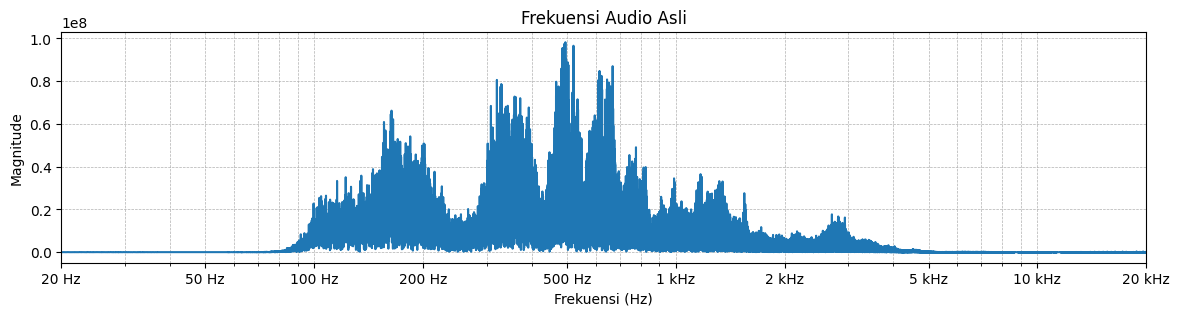

In [168]:
visualize_spectrum(audio_data, audio_params.framerate, "Frekuensi Audio Asli")

#### Menerapkan Low Pass Filtering

Pada low pass filtering, kita akan melewatkan frekuensi audio yang berada di bawah atau sama dengan 300Hz.


In [171]:
from scipy.signal import butter
from scipy.signal import filtfilt

In [175]:
# menentukan batas 
cutoff = 300
order = 5

In [176]:
b, a = butter(order, cutoff / (audio_params.framerate/2), btype='low')
lowpass_audio = filtfilt(b, a, audio_data)
lowpass_audio = lowpass_audio.astype(np.int16)

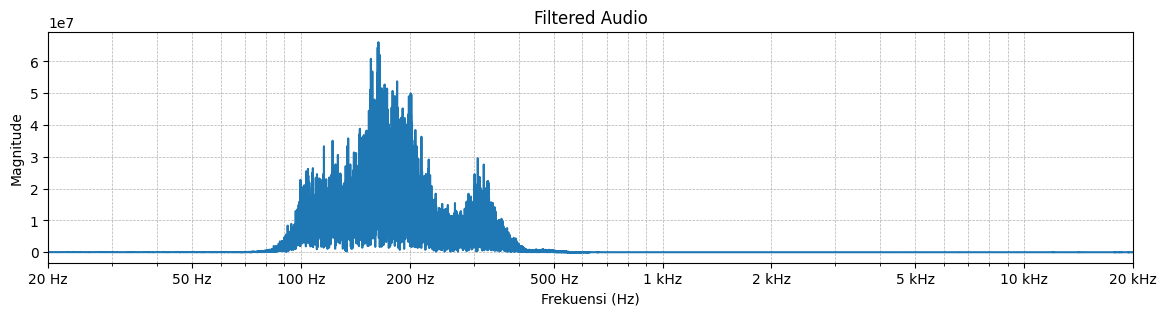

In [177]:
visualize_spectrum(lowpass_audio, audio_params.framerate, 'Filtered Audio')

Pada visualisasi spektrum, frekuensi dengan nominal diatas 300Hz sebagian telah dihilangkan, sehingga menyisakan bagian audio dengan frekuensi <=300Hz. Untuk mengukur keberhasilan dalam percobaan ini, maka kita akan membandingkan hasil dari pengukuran rata-rata dan nilai tertinggi dari frekuensi audio sebelum dilakukan lowpass filtering.


In [178]:
# Menghitung Transformasi Fourier
frequencies = np.fft.fftfreq(len(audio_data), 1/audio_params.framerate)
filtered_frequencies = np.fft.fftfreq(len(lowpass_audio), 1/audio_params.framerate)
spectrum = np.fft.fft(audio_data)
filtered_spectrum = np.fft.fft(lowpass_audio)

# Mengambil magnitudo spektrum
magnitude = np.abs(spectrum)
filtered_magnitude = np.abs(filtered_spectrum)

# Mendapatkan frekuensi tertinggi
peak_freq = frequencies[np.argmax(magnitude)]
filtered_peak_freq = filtered_frequencies[np.argmax(filtered_magnitude)]

# Menghitung frekuensi rata-rata
average_freq = np.sum(frequencies * magnitude) / np.sum(magnitude)
filtered_avg_freq = np.sum(filtered_frequencies * filtered_magnitude) / np.sum(filtered_magnitude)

print(f"Frekuensi tertinggi (Before): {peak_freq} Hz")
print(f"Frekuensi rata-rata (Before): {average_freq} Hz")
print(f"Frekuensi tertinggi (After): {filtered_peak_freq} Hz")
print(f"Frekuensi rata-rata (After): {filtered_avg_freq} Hz")

Frekuensi tertinggi (Before): 495.3405017921147 Hz
Frekuensi rata-rata (Before): -7.562443104273892e-05 Hz
Frekuensi tertinggi (After): 163.75448028673836 Hz
Frekuensi rata-rata (After): -1.2523435736934433e-05 Hz


Frekuensi tertinggi yang sebelumnya mencapai hingga 495 Hz, kini menurun menjadi 163 Hz. Dengan rata-rata frekuensi yang naik dari sebelumnya -7.56 menjadi -1.25. Dengan Begitu, percobaan lowpass filtering berhasil dilakukan. Selanjutnya kita coba dengarkan hasilnya.


In [179]:
output_path = os.path.join(os.getcwd(), 'lowpass_output', 'lowpass.wav')

if not os.path.exists(output_path):
    os.makedirs('lowpass_output')
else:
    pass

In [180]:
with wave.open(output_path, 'wb') as output:
    output.setparams(audio_params)
    output.writeframes(lowpass_audio.tobytes())

Dalam kasus data yang saya gunakan, noise pada frekuensi tinggi menghilang, namun suara dengan frekuensi tinggi juga ikut menghilang dan terdengar lebih kecil.


## Tugas 5 (Percobaan)


In [191]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import os

In [192]:
# audio asli / dataset
dataset = os.path.join(os.getcwd(), 'data_ho1', 'perkenalan.wav')

if not os.path.exists(dataset):
    raise ValueError("Dataset tidak ditemukan")

In [193]:
with wave.open(dataset, 'r') as input:
    audio_params = input.getparams()
    audio_data = np.frombuffer(input.readframes(audio_params.nframes), dtype=np.int16)

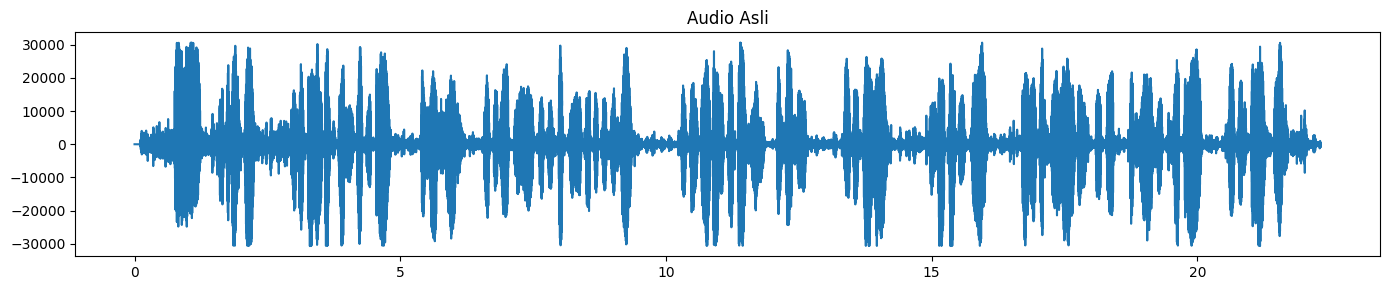

In [194]:
time_axis = np.linspace(0, audio_params.nframes/audio_params.framerate, audio_params.nframes)

plt.figure(figsize=(14, 3))
plt.title("Audio Asli")
plt.plot(time_axis, audio_data)
plt.tight_layout()
plt.show()

In [206]:
threshold = 2000
# menerapkan gate
audio_gated = np.where(np.abs(audio_data) < threshold, 0, audio_data)

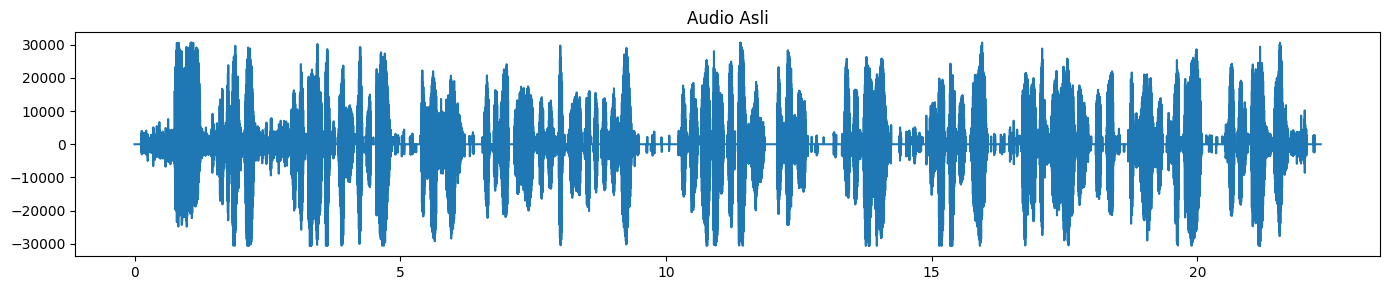

In [207]:
plt.figure(figsize=(14, 3))
plt.title("Audio Asli")
plt.plot(time_axis, audio_gated)
plt.tight_layout()
plt.show()

tidak ada perubahan yang nampak pada audio setelah diterapkan noise gate. Namun mari kita dengar audio nya langsung.


In [208]:
output_path = os.path.join(os.getcwd(), 'noise_gate', 'noise_gate.wav')

if not os.path.exists(output_path):
    os.makedirs('noise_gate')
else:
    pass

In [209]:
with wave.open(output_path, 'wb') as wf:
    wf.setnchannels(audio_params.nchannels)
    wf.setsampwidth(audio_params.sampwidth)
    wf.setframerate(audio_params.framerate)
    wf.writeframes(audio_gated.tobytes())

Setelah mencoba melakukan eksperimen noise gate pada audio dengan cara mengganti nilai yang berada di bawah threshold dengan nol, suara yang dihasilkan terkesan ramai dengan noise. Suara angin yang sebelumnya hanya terdengar lirih, kini menjadi semakin besar. Untuk sementara, hal ini kemungkinan disebabkan oleh nilai batas atau threshold yang terlalu besar, sehingga beberapa suara dengan frekuensi dibawah 1000 di hilangkan dan tertutupi oleh suara noise.


---

# Percakapan Dengan AI-LLM (Topik Fading Eksponensial)

### You

Apa itu teknik fading pada audio?

### Copilot

Teknik fading pada audio adalah proses mengubah volume suara secara bertahap. Ada dua jenis utama fading:

- Fade In: Volume suara meningkat secara bertahap dari nol hingga mencapai level yang diinginkan. Ini sering digunakan di awal lagu atau klip audio untuk membuat transisi yang halus dari keheningan ke suara penuh.
- Fade Out: Volume suara menurun secara bertahap hingga mencapai nol. Ini biasanya digunakan di akhir lagu atau klip audio untuk menciptakan efek penutupan yang halus.
  Teknik ini sangat berguna dalam produksi musik, film, dan video untuk memastikan transisi audio yang mulus dan profesional. Apakah Anda tertarik untuk mencoba teknik ini dalam proyek audio Anda?

### You

Fading linear itu seperti apa?

### Copilot

Fading linear adalah teknik di mana volume suara berubah secara konstan dari awal hingga akhir. Dalam konteks audio, ini berarti bahwa perubahan volume terjadi pada kecepatan yang tetap sepanjang durasi fade.
Misalnya, jika Anda melakukan fade out linear, volume akan berkurang secara bertahap dan konsisten dari level awal hingga mencapai nol. Begitu juga dengan fade in linear, volume akan meningkat secara bertahap dan konsisten dari nol hingga mencapai level yang diinginkan.
Teknik ini sering digunakan dalam produksi musik dan editing audio untuk menciptakan transisi yang halus dan terkontrol. Apakah Anda ingin mencoba teknik ini dalam proyek audio Anda?
: Sage Audio
: Audacity Manual

### You

Apa itu fading non linear?

### Copilot

Fading non-linear adalah teknik di mana perubahan volume suara tidak terjadi secara konstan, melainkan mengikuti pola yang lebih kompleks. Ada beberapa jenis fading non-linear yang umum digunakan:

- Logarithmic Fade: Volume berubah secara eksponensial, biasanya lebih lambat di awal dan lebih cepat di akhir (atau sebaliknya). Ini memberikan transisi yang lebih alami dan sering digunakan dalam musik dan film.
- Exponential Fade: Volume berubah dengan kecepatan yang meningkat atau menurun secara eksponensial. Ini bisa memberikan efek dramatis pada transisi audio.
- S-Curve Fade: Volume berubah mengikuti kurva S, yang berarti perubahan volume dimulai lambat, kemudian cepat di tengah, dan melambat lagi di akhir. Ini memberikan transisi yang sangat halus dan alami.
  Teknik fading non-linear sering digunakan untuk menciptakan efek audio yang lebih dinamis dan menarik. Apakah Anda tertarik untuk mencoba salah satu teknik ini dalam proyek audio Anda?

### You

Selain dari jenis, apa yang membedakan teknik fading linear dan non-linear berdasarkan tujuan kegunaannya?

### Copilot

Perbedaan utama antara teknik fading linear dan non-linear berdasarkan tujuan kegunaannya terletak pada efek dan nuansa yang ingin dicapai dalam transisi audio. Berikut adalah beberapa poin yang membedakan keduanya:
Fading Linear- Efek yang Konsisten: Fading linear memberikan perubahan volume yang konsisten dan terprediksi. Ini cocok untuk transisi yang sederhana dan langsung.

- Penggunaan Umum: Sering digunakan dalam situasi di mana perubahan volume yang halus dan tidak mencolok diperlukan, seperti dalam pengaturan volume dasar atau untuk menghindari suara yang tiba-tiba.
- Kontrol yang Mudah: Karena perubahan volume terjadi pada kecepatan yang tetap, teknik ini lebih mudah dikontrol dan diimplementasikan dalam perangkat lunak audio.
  Fading Non-Linear- Efek yang Dinamis: Fading non-linear memberikan perubahan volume yang lebih dinamis dan bervariasi, menciptakan transisi yang lebih menarik dan alami.
- Penggunaan Kreatif: Sering digunakan dalam produksi musik, film, dan video untuk menciptakan efek dramatis atau emosional. Misalnya, logarithmic fade dapat memberikan kesan peningkatan atau penurunan volume yang lebih alami.
- Penyesuaian yang Lebih Halus: Teknik ini memungkinkan penyesuaian volume yang lebih halus dan terperinci, sesuai dengan kebutuhan spesifik dari proyek audio.
  Secara keseluruhan, pilihan antara fading linear dan non-linear tergantung pada efek yang ingin Anda capai dan konteks penggunaan dalam proyek audio Anda. Apakah Anda memiliki proyek tertentu di mana Anda ingin mencoba salah satu teknik ini?

### You

Apa itu teknik fading exponential?

### Copilot

Teknik fading exponential adalah metode di mana perubahan volume suara terjadi secara eksponensial. Ini berarti bahwa perubahan volume tidak terjadi secara linear atau konstan, melainkan mengikuti kurva eksponensial. Ada dua jenis utama fading exponential:

- Exponential Fade In: Volume suara meningkat secara eksponensial dari nol hingga mencapai level yang diinginkan. Pada awalnya, peningkatan volume terjadi secara lambat, tetapi semakin cepat seiring waktu.
- Exponential Fade Out: Volume suara menurun secara eksponensial dari level awal hingga mencapai nol. Pada awalnya, penurunan volume terjadi secara cepat, tetapi semakin lambat seiring waktu.
  Teknik ini sering digunakan untuk menciptakan efek transisi yang lebih alami dan dinamis dalam produksi audio, seperti musik dan film. Efek eksponensial ini dapat memberikan nuansa yang lebih halus dan dramatis dibandingkan dengan fading linear.
  Apakah Anda tertarik untuk mencoba teknik ini dalam proyek audio Anda? Jika ya, saya bisa membantu Anda dengan beberapa contoh kode Python untuk menerapkannya.

### You

Tolong berikan langkah-langkah yang perlu dlilakukan untuk melakukan fading exponential pada audio menggunakan bahasa pemrograman python

### Copilot

Berikut adalah langkah-langkah untuk melakukan fading exponential pada audio menggunakan bahasa pemrograman Python:
Langkah 1: Instalasi Pustaka yang DiperlukanPastikan Anda telah menginstal pustaka numpy dan scipy yang akan kita gunakan untuk manipulasi audio.

`pip install numpy scipy`

Langkah 2: Membaca File AudioGunakan pustaka scipy untuk membaca file audio.

```python
import numpy as np
from scipy.io import wavfile
# Membaca file audio
sample_rate, data = wavfile.read('path/to/your/audiofile.wav')
```

Langkah 3: Membuat Fungsi Exponential FadeBuat fungsi untuk menerapkan exponential fade pada data audio.

```python
def exponential_fade(data, fade_type='in', fade_duration=1.0, sample_rate=44100):
    """
    Menerapkan exponential fade pada data audio.

    Parameters:
    - data: array numpy dari data audio
    - fade_type: 'in' untuk fade in, 'out' untuk fade out
    - fade_duration: durasi fade dalam detik
    - sample_rate: laju sampel dari audio

    Returns:
    - data yang telah difade
    """
    num_samples = int(fade_duration * sample_rate)
    fade_curve = np.exp(np.linspace(0, 5, num_samples)) - 1
    fade_curve = fade_curve / np.max(fade_curve)  # Normalisasi ke rentang 0-1

    if fade_type == 'in':
        fade_curve = fade_curve[::-1]  # Balikkan untuk fade in

    faded_data = data.copy()
    if fade_type == 'in':
        faded_data[:num_samples] *= fade_curve
    elif fade_type == 'out':
        faded_data[-num_samples:] *= fade_curve

    return faded_data
```

Langkah 4: Menerapkan Exponential FadeTerapkan fungsi exponential fade pada data audio.

```python
# Durasi fade dalam detik
fade_duration = 2.0

# Menerapkan fade in
faded_in_data = exponential_fade(data, fade_type='in', fade_duration=fade_duration, sample_rate=sample_rate)

# Menerapkan fade out
faded_out_data = exponential_fade(data, fade_type='out', fade_duration=fade_duration, sample_rate=sample_rate)
```

Langkah 5: Menyimpan File Audio yang Telah DifadeGunakan scipy untuk menyimpan file audio yang telah difade.

```python
# Menyimpan file audio yang telah difade
wavfile.write('path/to/your/faded_in_audiofile.wav', sample_rate, faded_in_data.astype(np.int16))
wavfile.write('path/to/your/faded_out_audiofile.wav', sample_rate, faded_out_data.astype(np.int16))
```

Dengan langkah-langkah ini, Anda dapat menerapkan exponential fade pada file audio menggunakan Python. Jika Anda mengalami kesulitan atau ada pertanyaan lebih lanjut, jangan ragu untuk bertanya!

### You

Bagaimana cara memvisualisasikan audio yang saya gunakan sebagai contoh baik saat sebelum ataupun sesudah melalui proses fading exponential?

### Copilot

Untuk memvisualisasikan audio sebelum dan sesudah proses fading exponential, Anda dapat menggunakan pustaka matplotlib dan numpy di Python. Berikut adalah langkah-langkahnya:
Langkah 1: Instalasi Pustaka yang DiperlukanPastikan Anda telah menginstal pustaka matplotlib dan numpy.
`pip install matplotlib numpy`
Langkah 2: Membaca dan Memproses File AudioGunakan kode yang telah kita buat sebelumnya untuk membaca dan memproses file audio.

```python
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Membaca file audio
sample_rate, data = wavfile.read('path/to/your/audiofile.wav')

# Fungsi untuk menerapkan exponential fade
def exponential_fade(data, fade_type='in', fade_duration=1.0, sample_rate=44100):
    num_samples = int(fade_duration * sample_rate)
    fade_curve = np.exp(np.linspace(0, 5, num_samples)) - 1
    fade_curve = fade_curve / np.max(fade_curve)  # Normalisasi ke rentang 0-1

    if fade_type == 'in':
        fade_curve = fade_curve[::-1]  # Balikkan untuk fade in

    faded_data = data.copy()
    if fade_type == 'in':
        faded_data[:num_samples] *= fade_curve
    elif fade_type == 'out':
        faded_data[-num_samples:] *= fade_curve

    return faded_data

# Durasi fade dalam detik
fade_duration = 2.0

# Menerapkan fade in dan fade out
faded_in_data = exponential_fade(data, fade_type='in', fade_duration=fade_duration, sample_rate=sample_rate)
faded_out_data = exponential_fade(data, fade_type='out', fade_duration=fade_duration, sample_rate=sample_rate)
```

Langkah 3: Memvisualisasikan AudioGunakan matplotlib untuk memvisualisasikan audio sebelum dan sesudah proses fading.

```python
# Fungsi untuk memvisualisasikan audio
def plot_audio(data, sample_rate, title):
    time = np.linspace(0., len(data) / sample_rate, len(data))
    plt.figure(figsize=(10, 4))
    plt.plot(time, data, label=title)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()

# Visualisasi audio asli
plot_audio(data, sample_rate, 'Original Audio')

# Visualisasi audio dengan fade in
plot_audio(faded_in_data, sample_rate, 'Exponential Fade In')

# Visualisasi audio dengan fade out
plot_audio(faded_out_data, sample_rate, 'Exponential Fade Out')
```

Dengan langkah-langkah ini, Anda dapat memvisualisasikan audio sebelum dan sesudah proses fading exponential. Visualisasi ini akan membantu Anda melihat bagaimana perubahan volume terjadi sepanjang durasi fade. Jika Anda memiliki pertanyaan lebih lanjut atau membutuhkan bantuan tambahan, jangan ragu untuk bertanya!

### You

Apa itu distorsi pada audio?

### Copilot

Distorsi pada audio adalah perubahan atau penyimpangan bentuk gelombang audio dari bentuk aslinya. Ini terjadi ketika sinyal audio yang keluar berbeda dari sinyal input yang diberikan. Distorsi dapat disebabkan oleh berbagai faktor, termasuk peralatan yang rusak, level sinyal yang terlalu tinggi, atau penggunaan efek audio tertentu.
Ada dua jenis utama distorsi audio:

- Distorsi Linear: Perubahan amplitudo sinyal tanpa menambahkan frekuensi baru. Ini bisa mengubah volume atau fase sinyal, tetapi tidak menambahkan suara baru.
- Distorsi Non-Linear: Perubahan konten frekuensi sinyal dengan menambahkan frekuensi baru yang tidak ada dalam sinyal asli. Ini sering menghasilkan suara tambahan seperti buzzing, hissing, atau crackling.
  Distorsi non-linear sering digunakan secara kreatif dalam produksi musik untuk memberikan karakteristik tertentu pada suara, seperti pada gitar listrik atau efek vokal. Namun, distorsi yang tidak diinginkan dapat merusak kualitas audio dan membuatnya terdengar kasar atau tidak jelas.
  Apakah Anda mengalami masalah distorsi pada proyek audio Anda? Jika ya, saya bisa membantu Anda mencari solusi untuk mengatasinya.

### You

Apa yang dapat dilakukan jika kita memiliki suara terdistorsi yang tidak diinginkan?

### Copilot

Jika Anda memiliki suara terdistorsi yang tidak diinginkan, ada beberapa langkah yang dapat Anda coba untuk memperbaikinya:

1. Periksa Level SinyalPastikan level sinyal audio tidak terlalu tinggi. Distorsi sering terjadi ketika sinyal terlalu kuat dan melebihi kapasitas perangkat perekam atau pemutar. Anda bisa menurunkan gain atau volume pada perangkat input atau software perekaman.
2. Gunakan Equalizer (EQ)Menggunakan equalizer untuk mengurangi frekuensi tertentu yang menyebabkan distorsi dapat membantu. Misalnya, jika distorsi terjadi pada frekuensi tinggi, Anda bisa menurunkan level frekuensi tersebut menggunakan EQ.
3. Gunakan Plugin Pengurangan DistorsiAda banyak plugin audio yang dirancang untuk mengurangi atau menghilangkan distorsi. Plugin berbasis AI seperti iZotope RX dapat sangat efektif dalam memperbaiki audio yang terdistorsi.
4. Perbaiki di SumbernyaJika memungkinkan, rekam ulang audio dengan pengaturan yang lebih baik. Pastikan mikrofon atau perangkat perekam berada pada jarak yang tepat dan tidak terlalu dekat dengan sumber suara.
5. Gunakan Alat Pengurangan KebisinganBeberapa alat pengurangan kebisingan juga dapat membantu mengurangi distorsi dengan menghilangkan suara yang tidak diinginkan dari rekaman.
6. Pemecah Masalah Audio di WindowsJika Anda menggunakan Windows, Anda bisa menjalankan pemecah masalah audio bawaan untuk mendeteksi dan memperbaiki masalah suara.
7. Periksa Perangkat KerasPastikan semua kabel dan koneksi perangkat keras dalam kondisi baik. Kabel yang rusak atau koneksi yang longgar dapat menyebabkan distorsi.
8. Gunakan Software Editing AudioSoftware editing audio seperti Audacity atau Adobe Audition memiliki alat untuk memperbaiki distorsi. Anda bisa menggunakan fitur seperti "Clip Fix" di Audacity untuk mencoba memperbaiki klip audio yang terdistorsi.
   Jika Anda membutuhkan panduan lebih rinci atau memiliki pertanyaan spesifik, jangan ragu untuk bertanya! Saya siap membantu Anda lebih lanjut.

### You

Alih alih semua itu, saya menemukan salah satu teknik untuk mengurangi distorsi yang disebut dengan "Normalisasi". Sebenarnya bagaimana teknik normalisasi bekerja dalam menghilangkan atau mengurangi distorsi pada audio?

### Copilot

Normalisasi adalah teknik yang digunakan untuk menyesuaikan level volume dari file audio sehingga mencapai tingkat amplitudo tertentu tanpa mengubah rentang dinamis trek. Meskipun normalisasi tidak secara langsung menghilangkan distorsi, teknik ini dapat membantu mengurangi efek distorsi dengan cara berikut:
Cara Kerja Normalisasi- Normalisasi Puncak (Peak Normalization): - Proses: Normalisasi puncak menyesuaikan volume maksimum dari sinyal audio ke level tertentu, biasanya mendekati 0 dB. Ini dilakukan dengan mengidentifikasi puncak tertinggi dalam sinyal audio dan kemudian meningkatkan atau menurunkan seluruh sinyal sehingga puncak tersebut mencapai level target. - Manfaat: Membantu memastikan bahwa sinyal audio tidak terlalu keras atau terlalu pelan, yang dapat mengurangi risiko distorsi akibat clipping (pemotongan sinyal).

- Normalisasi Rata-rata (Loudness Normalization): - Proses: Normalisasi rata-rata menyesuaikan volume keseluruhan dari sinyal audio berdasarkan persepsi kenyaringan manusia. Ini sering menggunakan standar seperti LUFS (Loudness Units relative to Full Scale) untuk memastikan konsistensi volume antar trek. - Manfaat: Membantu menciptakan pengalaman mendengarkan yang lebih konsisten dan nyaman, terutama ketika mendengarkan beberapa trek audio secara berurutan.
  Mengurangi Distorsi dengan Normalisasi- Menghindari Clipping: Dengan menormalkan audio, Anda dapat memastikan bahwa sinyal tidak melebihi batas maksimum yang dapat ditangani oleh perangkat keras atau perangkat lunak, sehingga mengurangi risiko distorsi akibat clipping.
- Konsistensi Volume: Normalisasi membantu menjaga konsistensi volume antar trek, yang dapat mengurangi kebutuhan untuk penyesuaian volume manual yang dapat menyebabkan distorsi.
- Optimalisasi Penguatan: Dengan menyesuaikan level penguatan secara tepat, normalisasi dapat membantu mengoptimalkan kualitas audio tanpa menambahkan distorsi yang tidak diinginkan.
  Langkah-langkah Normalisasi di PythonBerikut adalah contoh sederhana untuk melakukan normalisasi puncak menggunakan Python:

```python
import numpy as np
from scipy.io import wavfile

# Membaca file audio
sample_rate, data = wavfile.read('path/to/your/audiofile.wav')

# Normalisasi puncak
def peak_normalize(data):
    max_val = np.max(np.abs(data))
    normalized_data = data / max_val
    return normalized_data

# Menerapkan normalisasi
normalized_data = peak_normalize(data)

# Menyimpan file audio yang telah dinormalisasi
wavfile.write('path/to/your/normalized_audiofile.wav', sample_rate, (normalized_data * 32767).astype(np.int16))
```

Dengan langkah-langkah ini, Anda dapat menormalkan file audio Anda dan mengurangi risiko distorsi. Jika Anda memiliki pertanyaan lebih lanjut atau membutuhkan bantuan tambahan, jangan ragu untuk bertanya!


---

# Percakapan Dengan AI-LLM (Topik Noise Gate)

### You

Apa itu noise gate pada audio?

### Copilot

Noise gate adalah perangkat atau perangkat lunak yang digunakan untuk mengontrol volume sinyal audio. Fungsinya mirip dengan kompresor, tetapi dengan cara yang berbeda. Jika kompresor mengurangi volume sinyal yang melebihi ambang batas tertentu, noise gate justru mengurangi atau mematikan sinyal yang berada di bawah ambang batas tersebut.
Berikut adalah beberapa poin penting tentang noise gate:

- Ambang Batas (Threshold): Noise gate akan membuka dan membiarkan sinyal audio lewat jika sinyal tersebut melebihi ambang batas yang telah ditentukan. Jika sinyal berada di bawah ambang batas, gate akan menutup dan mematikan sinyal tersebut.
- Attack dan Release: Attack mengatur seberapa cepat gate membuka setelah sinyal melebihi ambang batas, sedangkan release mengatur seberapa cepat gate menutup setelah sinyal turun di bawah ambang batas.
- Penggunaan Umum: Noise gate sering digunakan untuk menghilangkan kebisingan latar belakang atau suara yang tidak diinginkan dalam rekaman. Misalnya, pada rekaman vokal, noise gate dapat membantu mengurangi suara napas atau kebisingan ruangan di antara frasa vokal.
  Apakah Anda tertarik untuk mengetahui cara mengatur noise gate dalam perangkat lunak audio tertentu atau ada hal lain yang ingin Anda ketahui?

### You

Apa saja yang perlu diperhatikan untuk mulai menerapkan noise gate pada audio?

### Copilot

Untuk mulai menerapkan noise gate pada audio, ada beberapa hal yang perlu diperhatikan agar hasilnya optimal:

- Ambang Batas (Threshold):
  - Tentukan ambang batas yang tepat di mana noise gate akan mulai bekerja. Jika ambang batas terlalu rendah, noise gate mungkin tidak efektif menghilangkan kebisingan. Jika terlalu tinggi, bagian penting dari sinyal audio bisa terpotong.
- Attack dan Release:
  - Attack: Atur seberapa cepat noise gate membuka setelah sinyal melebihi ambang batas. Attack yang terlalu cepat bisa menyebabkan suara terdengar tidak alami.
  - Release: Atur seberapa cepat noise gate menutup setelah sinyal turun di bawah ambang batas. Release yang terlalu cepat bisa menyebabkan suara terdengar terputus-putus.
- Hold:
  - Beberapa noise gate memiliki pengaturan hold yang menentukan berapa lama gate tetap terbuka setelah sinyal turun di bawah ambang batas. Ini bisa membantu menghindari penutupan gate yang terlalu cepat.
- Range:
  - Atur seberapa banyak sinyal yang akan dikurangi ketika gate tertutup. Ini bisa membantu mengontrol seberapa drastis pengurangan kebisingan.
- Sidechain:
  - Beberapa noise gate memungkinkan penggunaan sidechain, di mana sinyal dari sumber lain digunakan untuk mengontrol pembukaan dan penutupan gate. Ini bisa berguna dalam situasi tertentu, seperti mengurangi kebisingan latar belakang saat vokal tidak aktif.
- Monitoring:
  - Selalu monitor hasil akhir dengan teliti. Dengarkan dengan headphone berkualitas baik untuk memastikan bahwa noise gate bekerja sesuai harapan tanpa menghilangkan bagian penting dari sinyal audio.
- Eksperimen: - Jangan ragu untuk bereksperimen dengan berbagai pengaturan. Setiap rekaman audio memiliki karakteristik yang berbeda, jadi pengaturan yang optimal bisa bervariasi.
  Jika Anda menggunakan perangkat lunak audio tertentu, biasanya ada preset yang bisa dijadikan titik awal. Apakah ada perangkat lunak atau plugin tertentu yang Anda gunakan atau ingin tahu lebih lanjut?

### You

Jelaskan secara umum terkait dengan audio yang sudah diterapkan noise gate

### Copilot

Noise gate adalah alat atau perangkat lunak yang digunakan untuk mengontrol volume sinyal audio dengan menghilangkan suara di bawah ambang batas tertentu. Ini sangat berguna untuk mengurangi kebisingan latar belakang yang tidak diinginkan dalam rekaman audio. Berikut adalah penjelasan umum tentang bagaimana noise gate bekerja dan penggunaannya:
Cara Kerja Noise Gate- Ambang Batas (Threshold): Noise gate akan "terbuka" jika sinyal audio melebihi ambang batas yang ditetapkan, memungkinkan audio untuk melewati. Jika sinyal berada di bawah ambang batas, noise gate akan "tertutup", mengurangi atau menghilangkan sinyal tersebut.

- Kontrol Serangan (Attack): Mengatur seberapa cepat gate terbuka setelah sinyal melewati ambang batas.
- Kontrol Pelepasan (Release): Mengatur seberapa cepat gate menutup setelah sinyal turun di bawah ambang batas.
- Kontrol Tahan (Hold): Menentukan berapa lama gate tetap terbuka setelah sinyal turun di bawah ambang batas sebelum mulai menutup.
  Penggunaan Noise Gate- Menghilangkan Kebisingan Latar Belakang: Sangat efektif untuk menghilangkan suara latar seperti dengungan amplifier pada gitar listrik atau suara napas pada vokal.
- Meningkatkan Kejelasan Audio: Membantu meningkatkan kejelasan rekaman dengan mengurangi kebisingan yang tidak diinginkan antara frasa atau nada.
  Contoh Penggunaan- Rekaman Vokal: Mengurangi suara napas dan kebisingan ruangan antara frasa vokal.
- Instrumen Musik: Mengurangi dengungan atau desis dari efek distorsi pada gitar listrik.
  Dengan menggunakan noise gate, Anda dapat menghasilkan rekaman audio yang lebih bersih dan profesional. Apakah Anda tertarik untuk mencoba menerapkan noise gate pada rekaman Anda sendiri?

### You

Bagaiamana cara menerapkan noise gate dengan bahasa pemrograman python (Usahakan untuk meminimalisir penggunaan library diluar bawaan python)?

### Copilot

Untuk menerapkan noise gate menggunakan Python dengan meminimalisir penggunaan library di luar bawaan Python, kita bisa menggunakan library standar seperti wave dan numpy. Berikut adalah contoh sederhana bagaimana menerapkan noise gate:

- Membaca File Audio: Menggunakan library wave untuk membaca file audio.
- Menghitung Ambang Batas: Menentukan ambang batas untuk noise gate.
- Menerapkan Noise Gate: Menggunakan numpy untuk memproses data audio dan menerapkan noise gate.
- Menyimpan File Audio: Menyimpan hasil audio yang telah diproses kembali ke file.
  Berikut adalah contoh kode untuk menerapkan noise gate:

```python
import wave
import numpy as np

def apply_noise_gate(input_wave_file, output_wave_file, threshold):
    # Membaca file audio
    with wave.open(input_wave_file, 'rb') as wf:
        params = wf.getparams()
        frames = wf.readframes(params.nframes)
        audio_data = np.frombuffer(frames, dtype=np.int16)

    # Menerapkan noise gate
    gated_audio = np.where(np.abs(audio_data) < threshold, 0, audio_data)

    # Menyimpan file audio yang telah diproses
    with wave.open(output_wave_file, 'wb') as wf:
        wf.setparams(params)
        wf.writeframes(gated_audio.tobytes())

# Contoh penggunaan
input_wave_file = 'input.wav'
output_wave_file = 'output.wav'
threshold = 500  # Sesuaikan ambang batas sesuai kebutuhan
apply_noise_gate(input_wave_file, output_wave_file, threshold)
```

Penjelasan Kode:- Membaca File Audio: Kode ini menggunakan wave.open untuk membaca file audio dan mengonversi data audio menjadi array numpy.

- Menghitung Ambang Batas: Ambang batas ditentukan oleh variabel threshold. Nilai ini bisa disesuaikan berdasarkan kebutuhan.
- Menerapkan Noise Gate: Menggunakan numpy.where untuk mengganti nilai audio yang berada di bawah ambang batas dengan nol.
- Menyimpan File Audio: Hasil audio yang telah diproses disimpan kembali ke file menggunakan wave.open.
  Apakah Anda ingin mencoba kode ini atau ada hal lain yang ingin Anda ketahui lebih lanjut?
